<a href="https://colab.research.google.com/github/211604270720/Tasks_UII/blob/master/%22%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA_%7C_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B9_%D1%81%D0%BB%D0%BE%D0%B9_(Dense)_%7C_%D0%94%D0%97_Ultra_Pro_%7C_%D0%A3%D0%98%D0%98%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание

Распознайте рукописную цифру, написанную на листе от руки.
Последовательность шагов следующая:

*   На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не
более 5 * 5 мм и без наклона. В занятии нейронка обучалась на цифрах американских студентов. Эти цифры были написаны на тетрадных листах в клетку и имели схожий размер).
*   Фотографируем. Загружаем фото в Collaboratory.
*   С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
*   С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
*   Выполняем инверсию цветов, нормирование и решейп массива.
*   Выполняем распознавание собственной рукописной цифры.

Примечание: точность распознавания рукописных цифр может быть достаточно низкой, т.к. рукописные цифры после преобразований хоть и похожи на содержащиеся в базе, но могут отличаться по конфигурации, толщине линий и т.д.


In [ ]:
from tensorflow.keras.datasets import mnist     # Библиотека с базой рукописных цифр
from tensorflow.keras.models import Sequential  # Подключение класса создания модели Sequential
from tensorflow.keras.layers import Dense       # Подключение класса Dense - полносвязный слой
from tensorflow.keras import utils              # Утилиты для подготовки данных
import numpy as np                              # Работа с массивами
import matplotlib.pyplot as plt                 # Отрисовка изображений

# Отрисовка изображений в ячейках ноутбука
%matplotlib inline

In [ ]:
# Загрузка из облака данных Mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

# Изменение формы входных картинок с 28х28 на 784
# первая ось остается без изменения, остальные складываются в вектор
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

# Задание константы количества распознаваемых классов
CLASS_COUNT = 10

# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(8000, input_dim=784, activation='relu'))

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(400, activation='relu'))

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=128, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=20,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)      # 0 - не визуализировать ход обучения, 1 - визуализировать

model.save_weights('model.h5')
model.load_weights('model.h5')


11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/20
469/469 [==============================] - 12s 6ms/step - loss: 0.1868 - accuracy: 0.9416
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0733 - accuracy: 0.9766
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0484 - accuracy: 0.9848
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0363 - accuracy: 0.9878
Epoch 5/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0285 - accuracy: 0.9905
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0210 - accuracy: 0.9937
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0195 - accuracy: 0.9934
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0191 - accuracy: 0.9937
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0173 - accuracy: 0.9944
Epoch 10/20
469/469 [=============

# Мои цифры

In [6]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [14]:
# Загружаем картинку в переменную num
num = load_img('/content/num.png', target_size=(28, 28), color_mode = 'grayscale')

# Преобразуем изображение в numpy-массив
ar_0 = img_to_array(num)

# Инверсия цветов
ar_0 = 255 - ar_0

# Нормализация
ar_0 = ar_0 / 255.0

# Изменение формы входящей картинки с 28х28 на 784
# первая ось остается без изменения, остальные складываются в вектор
arr_0 = ar_0.reshape(-1)

# Добавление одной оси в начале, чтобы нейронка могла распознать пример
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
arr_0 = np.expand_dims(arr_0, axis=0)

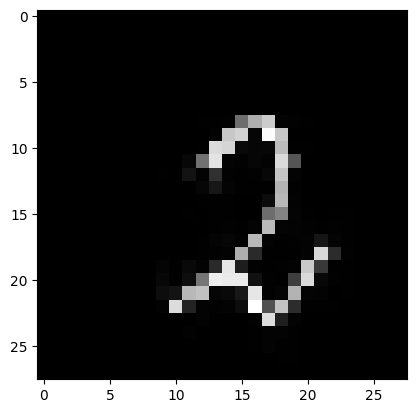

In [15]:
# Выводим примера на экран
plt.imshow(ar_0, cmap='gray')
plt.savefig('/content/figure_1.jpg') # Сохраняем график в файл

In [16]:
# Распознавание примера
prediction = model.predict(arr_0)

1/1 [==============================] - 0s 91ms/step


In [17]:
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')

Распознана цифра: 2
